In [1]:
from fastai.vision.all import *
import fastai

In [2]:
path = untar_data(URLs.IMAGENETTE, archive='D:\FastAi_Data')

In [13]:
dblock = DataBlock(
    blocks = (ImageBlock,CategoryBlock),
    get_items= get_image_files,
    get_y = parent_label,
    item_tfms= Resize(460),
    batch_tfms= aug_transforms(size=224, min_scale=0.75))
dls = dblock.dataloaders(path,bs=64)

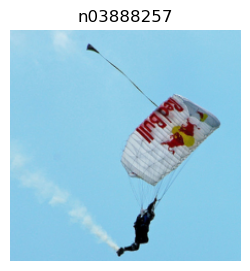

In [52]:
dls.show_batch(max_n=1)

In [16]:
model = xresnet18(n_out = dls.c)
learn = Learner(dls, model, loss_func = CrossEntropyLossFlat(), metrics = accuracy)
learn.fit_one_cycle(5,3e-3)

epoch,train_loss,valid_loss,accuracy,time
0,1.508342,1.449285,0.531367,04:20
1,1.137820,1.468480,0.550411,04:27
2,0.894963,0.845812,0.730396,04:30
3,0.681035,0.642395,0.797237,05:22
4,0.592215,0.568355,0.818895,10:32


In [9]:
learn_resnet = Learner(dls, resnet50, metrics = accuracy, pretrained = False)

10

In [34]:
preds,targs = learn.tta()
accuracy(preds, targs).item()

0.8289768695831299

In [75]:
class CornerAndCenterCrop(Transform):
    def __init__(self, size, corner = 0, **kwargs):
        self.size = size
        self.corner = corner
    
    def encodes(self, x:(Image.Image,TensorBBox,TensorPoint)):
        self.w, self.h = x.size
        
        left = self.w- self.size
        top = self.h- self.size
        right = self.w
        bottom = self.h
        
        self.crops = [
            x.crop((0, 0, self.size, self.size)), ## top-left
            x.crop((left, 0, right, self.size)), ## top-right
            x.crop((0, top, self.size,bottom)), ## bottom-left
            x.crop((left, top, right,bottom)), ## bottom-right
            x.crop(((self.w/2)-self.size/2, self.h/2 - self.size/2,   ## Center
                      (self.w/2)+self.size/2, self.h/2 + self.size/2 )),
        ]
        
        return self.crops[self.corner]

In [76]:
dblock_test = DataBlock(
    blocks = (ImageBlock,CategoryBlock),
    get_iStems = get_image_files,
    get_y = parent_label,
    item_tfms= CornerAndCenterCrop(164,0)
)

dls_test = dblock_test.dataloaders(path,bs=64)

In [ ]:
dls_test.show_batch()